In [13]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import sklearn
import sklearn.cross_validation as cv
import sklearn.grid_search as gs
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
f = lambda x : np.exp( 3 * x )

In [3]:
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

In [4]:
x = np.array([0, .1, .2, .3, .5, .8, .9 , 1])
y = f(x) + np.random.randn(len(x))

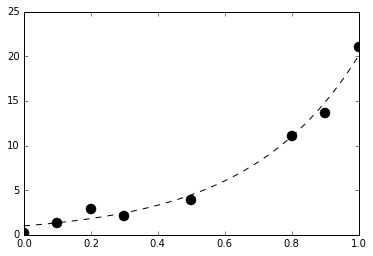

In [5]:
plt.plot(x_tr[:100], y_tr[:100], "--k")
plt.plot(x, y , "ok", ms=10)

In [6]:
lr = lm.LinearRegression()
lr.fit(x[: , np.newaxis], y)
y_lr = lr.predict(x_tr[:, np.newaxis])

(-0.78848205256040482, 22.021444154047114)

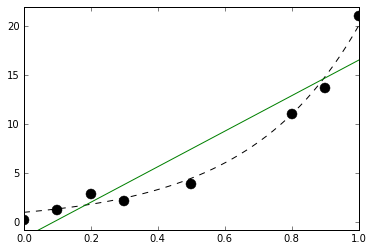

In [7]:
plt.plot(x_tr, y_tr, "--k")
plt.plot(x_tr, y_lr, "g")
plt.plot(x,y, "ok", ms=10)
plt.xlim(0,1)
plt.ylim(y.min()-1, y.max()+1)

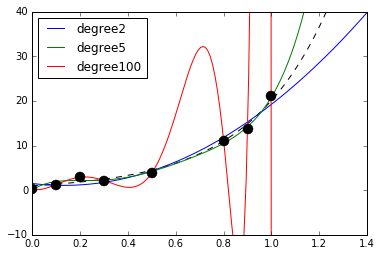

In [8]:
plt.plot(x_tr, y_tr, "--k")
for deg in [2 ,5, 100]:
    lr.fit(np.vander(x, deg+1), y)
    y_lrp = lr.predict(np.vander(x_tr, deg+1))
    plt.plot(x_tr, y_lrp, label ="degree"+str(deg))
    plt.legend(loc=2)
    plt.xlim(0, 1.4)
    plt.ylim(-10, 40)
plt.plot(x,y, "ok", ms=10)

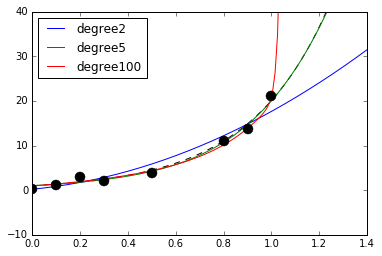

In [12]:
ridge = lm.RidgeCV()
plt.plot(x_tr, y_tr, "--k")

for deg in [2, 5, 100]:
    ridge.fit(np.vander(x, deg+1), y)
    y_lrp = ridge.predict(np.vander(x_tr, deg+1))
    plt.plot(x_tr, y_lrp, label ="degree"+str(deg))
    plt.legend(loc=2)
    plt.xlim(0, 1.4)
    plt.ylim(-10, 40)
plt.plot(x,y, "ok", ms=10)

# 8.2 ロジスティック回帰

In [14]:
train = pd.read_csv("data/titanic/titanic_train.csv")
test = pd.read_csv("data/titanic/titanic_test.csv")
train[train.columns[[2,4,5,1]]].head()

,Pclass,Sex,Age,Survived
0,3,male,22,0
1,1,female,38,1
2,3,female,26,1
3,1,female,35,1
4,3,male,35,0


In [15]:
data = train[["Sex", "Age", "Pclass", "Survived"]].copy()
data["Sex"] = data["Sex"] == "female"
data = data.dropna()

In [16]:
data_np = data.astype(np.int32).values
X = data_np[:, :-1]
Y = data_np[:, -1]

In [20]:
female = X[:, 0] ==1
survived = Y == 1
age = X[:, 1]
bins_ = np.arange(0, 81, 5)

In [21]:
S = {
    "male": np.histogram(age[survived & ~female], bins=bins_)[0],
    "female": np.histogram(age[survived & female], bins=bins_)[0]
}
D = {
    "male": np.histogram(age[~survived & ~female], bins=bins_)[0],
    "female": np.histogram(age[~survived & female], bins=bins_)[0]
}

In [ ]:
bins = bins_[:-1]
for i, sex, color in zip((0,1), ("male", "female"), ("#3345d0", "#cc3dc0")):
    plt.subplot(121 + i)
    plt.bar(bins, S[sex], bottom=D[sex], color=color, width=5, label="su")